### Water Quality Prediction

### Excercise - Creating our own custom Model
This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model. You will be utilizing Keras and Tensorflow

### Water Quality Dataset
This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv

### Step 0: Clean the dataset

In [ ]:
import pandas as pd

# Load the dataset
dataset = "water_potability.csv"
data = pd.read_csv(dataset)

# Replace 'black' with NaN (if applicable)
data.replace(to_replace="black", value=pd.NA, inplace=True)

# Fill missing values in numerical columns with the mean
for col in data.select_dtypes(include=['number']):
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing values in categorical columns with mode
for col in data.select_dtypes(include=['object']):  
    if not data[col].mode().empty:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Save cleaned dataset
data.to_csv("cleaned_file.csv", index=False)


### step 1: Load cleaned datasets

In [4]:
dataset = "cleaned_file.csv"
data = pd.read_csv(dataset)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# generate 2d classification dataset
X = data.drop(columns=['Potability'], axis=1)
y = data['Potability']

### Step 2: Data Preprocessing and Data Splitting

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# plit dataset into features (X) and target (y)
X = data.iloc[:, :-1]
Y = data.iloc[:, -1] 

# normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# First split: Train (70%) and temp (30% for validation + test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# display the shape of each set
print(f"Training Data: {X_train.shape}, Training Labels: {Y_train.shape}")
print(f"Validation Data: {X_val.shape}, Validation Labels: {Y_val.shape}")
print(f"Testing Data: {X_test.shape}, Testing Labels: {Y_test.shape}")


Training Data: (2293, 9), Training Labels: (2293,)
Validation Data: (491, 9), Validation Labels: (491,)
Testing Data: (492, 9), Testing Labels: (492,)


### Step 3: Model Building with Optimization Techniques


c:\Users\thinkBIG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5851 - loss: 1.0365 - val_accuracy: 0.6354 - val_loss: 0.9523
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6084 - loss: 0.9490 - val_accuracy: 0.6436 - val_loss: 0.8997
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6253 - loss: 0.8948 - val_accuracy: 0.6456 - val_loss: 0.8595
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6378 - loss: 0.8564 - val_accuracy: 0.6477 - val_loss: 0.8257
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6425 - loss: 0.8214 - val_accuracy: 0.6517 - val_loss: 0.7968
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6625 - loss: 0.8015 - val_accuracy: 0.6456 - val_loss: 0.7658
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6440 - loss: 0.7776 - val_accuracy: 0.6599 - val_loss: 0.7460
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6538 - loss: 0.7647 - val_accuracy: 0.6701 - 

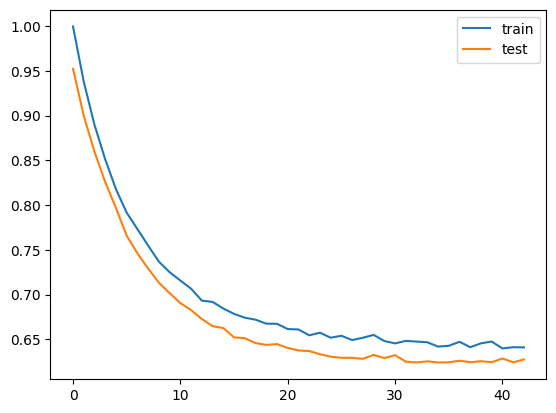

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as pyplot

# Model Definition by Festus
def model_Festus():
    model = Sequential()
    
    # Input Layer
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', 
                    kernel_regularizer=tf.keras.regularizers.l1(0.001)))

    model.add(Dropout(0.2))  # Dropout Layer to prevent overfitting

    # # add second hidden layer with l1 regularization
    model.add(Dense(32, activation='relu', 
                    kernel_regularizer=tf.keras.regularizers.l1(0.001)))
    
    # Output Layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # compile the model
    optimizer = RMSprop(learning_rate=0.001)
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# lets do Early Stopping
EarlyStopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
    )

# train the model
history = model_Festus().fit(
    X_train, 
    Y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_val, Y_val), 
    callbacks=[EarlyStopping])

# evaluate the model
loss, accuracy = model_Festus().evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Extract accuracy from training history
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print('Train: %.3f, Test: %.3f' % (train_acc, val_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
     
